# Carga de datos y exploración

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('sample_data/california_housing_train.csv')

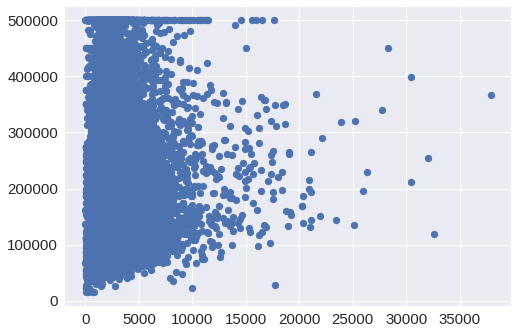

In [0]:
X = dataset[['total_rooms']].values
y = dataset[['median_house_value']].values
plt.scatter(X, y)

In [0]:
cols=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']

#Matriz de Correlación

cm = np.corrcoef(dataset[cols].T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

# Generar datos de entrenamiento y test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#Regresión Lineal

In [0]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
lr = regressor.fit(X_train, y_train)

In [0]:
X_train

array([[1766.],
       [1932.],
       [1265.],
       ...,
       [2236.],
       [3768.],
       [3320.]])

In [0]:
#Realizamos la predicción con test
print(lr.predict(X_test))

[[212877.71769952]
 [199887.40310291]
 [209883.04486575]
 ...
 [219282.43185855]
 [202815.0810187 ]
 [203706.11342785]]


In [0]:
print(" lr.coef_:", lr.coef_) 
print(" lr.intercept_:", lr.intercept_)
#los guiones bajos representan siempre en sklearn valores derivados de datos de entrenamiento

 lr.coef_: [[6.6994918]]
 lr.intercept_: [189978.85473345]


In [0]:
#Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_lr),mean_squared_error(y_test, y_test_pred_lr)))

# Si MSE es mayor en test que en train, clara muestra de overfitting

MSE train: 13328590099.189, test: 13006227969.682


In [0]:
print('R-squared train score: {:.3f}'
     .format(lr.score(X_train, y_train)))
print('R-squared test score: {:.3f}'
     .format(lr.score(X_test, y_test)))



R-squared train score: 0.016
R-squared test score: 0.018


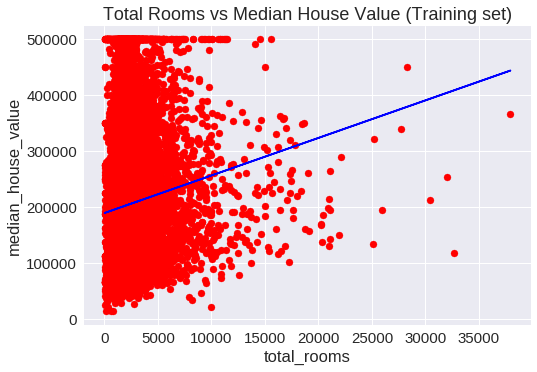

In [0]:
y_pred = regressor.predict(X_test)
# Creamos el fit lineal utilizando el conjunto de entrenamiento
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Total Rooms vs Median House Value (Training set)')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()

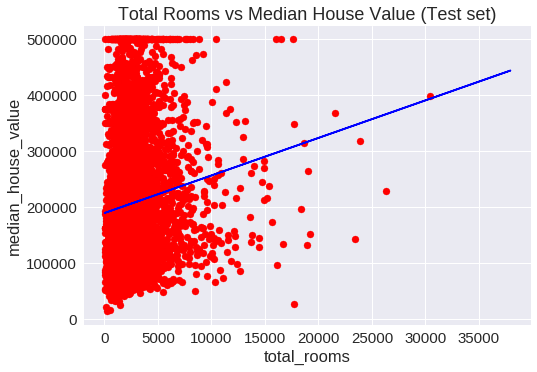

In [0]:
# Aplicamos el fit lineal al conjunto de prueba
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Total Rooms vs Median House Value (Test set)')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()

# k-NN Regresor

In [0]:
from sklearn.neighbors import KNeighborsRegressor

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

In [0]:
#realizamos la predicción

print(knnreg.predict(X_test))

[[228520.]
 [236120.]
 [120580.]
 ...
 [312920.]
 [233180.]
 [175860.]]


In [0]:
#Mean Squared Error (MSE)

y_train_pred_knn = knnreg.predict(X_train)
y_test_pred_knn = knnreg.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_knn),mean_squared_error(y_test, y_test_pred_knn)))

MSE train: 10791346441.254, test: 15389936678.808


In [0]:
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

R-squared test score: -0.161


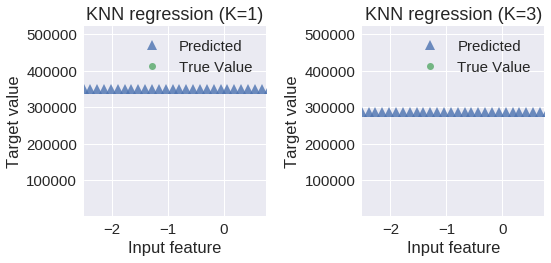

In [0]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_train[0::5], y_train[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

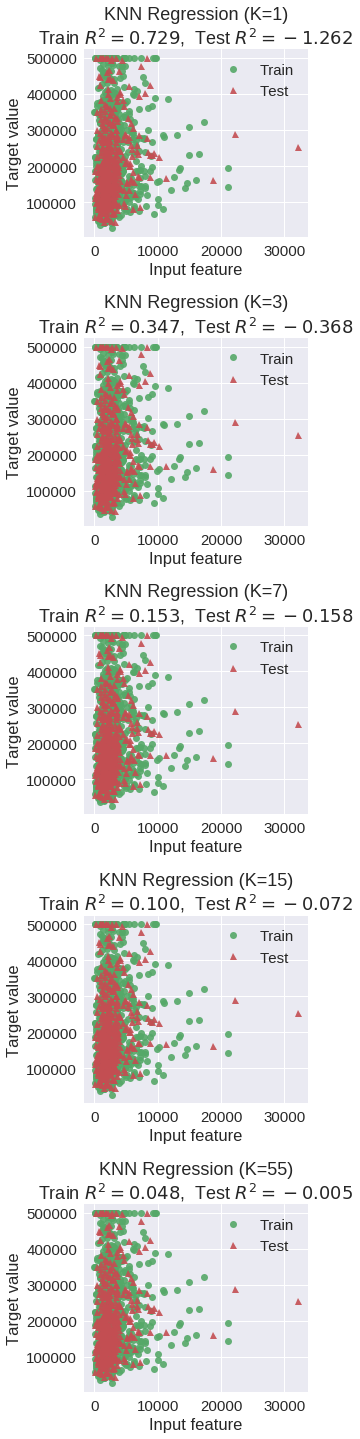

In [0]:
# plot k-NN regression pra diferentes valores de k

fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)